<a href="https://colab.research.google.com/github/saritmaitra/Natural-Gas_Paul/blob/master/nat_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
%matplotlib inline  
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
!pip install quandl
import quandl
plt.style.use('ggplot')
from statistics import variance 
from random import randint
import scipy as sp
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, roc_auc_score, mean_squared_error
from xgboost import XGBClassifier, plot_importance
!pip install fredapi
from fredapi import Fred
!pip install EIA_python
import eia
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split, TimeSeriesSplit
from xgboost import XGBRegressor
import xgboost as xgb
!pip install ffn
import ffn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
import pandas_datareader as web

In [0]:
# Moving averages crossover Plot 
df1 = data['Adj Close'].copy()
sma5 = df1.rolling(window=5).mean()
sma20 = df1.rolling(window=20).mean()

fig = plt.figure(figsize=(20,6))
plt.plot(df1, color='gray', label='Last')
# Plot the buy and sell signals on the same plot
#  When the shorter-term MA crosses above the longer-term MA (Golden cross), it's a buy signal, it indicates that the trend is shifting up. 
#  When the shorter-term MA crosses below the longer-term MA, it's a sell signal (dead/death cross), it indicates that the trend is shifting down. 
plt.plot(sma5.dropna(), color='r', label = 'sma20')
plt.plot(sma20.dropna(), color='g', label = 'sma100')
plt.ylabel('Price')
plt.xlabel('Date')
plt.suptitle('SMA crossover')
plt.title('Buy -> Shorter MA crosses below longer MA (Deadcross); Sell -> Shorter MA crosses above longer MA (Golden cross)')
plt.legend(loc=0)

# Display everything
plt.show()
print('\n')

In [0]:
# US Coal Prices by Region
print('\033[4mUS Coal Prices by Region\033[0m')
coal = quandl.get("EIA/COAL", authtoken="LSQpgUzwJRoF667ZpzyL") 
coal = coal.loc['2000-01-01':,]

US Coal Prices by Region


In [0]:
# U.S. Natural Gas Rotary Rigs in Operation, Monthly
print('\033[4mNatural Gas Rotary Rigs in Operation, Monthly (Number of Elements)\033[0m')
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    drilling = pd.DataFrame(series_search)
    return drilling

def main():
    """
    Run main script
    """
    try:
      #Create EIA API using your specific API key
      api_key = "ad819ee5a69e69390eadf300fa168fa8"
      api = eia.API(api_key)
      #Declare desired series ID
      series_ID='PET.E_ERTRRG_XR0_NUS_C.M '
      drilling = retrieve_time_series(api, series_ID)
      #Print the returned dataframe df
      print(type(drilling))
      return drilling;
    except Exception as e:
      print("error", e)
      return pd.DataFrame(columns=None)
  
drilling = main()
drilling = drilling.rename({'U.S. Natural Gas Rotary Rigs in Operation, Monthly (Number of Elements)': 'drilling'}, axis = 'columns')
drilling = drilling.reset_index()
drilling['Date']= pd.to_datetime(drilling['index']) 
drilling.set_index('Date', inplace=True) # setting index column
drilling = drilling.loc['2000-01-01':,['drilling']] # setting date range
drilling = drilling.astype(float)
drilling = drilling.resample('D').ffill().bfill()
drilling = drilling/21
#print(drilling)
#print('\n')


Natural Gas Rotary Rigs in Operation, Monthly (Number of Elements)


<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>

In [0]:
# U.S. Natural Gas Exports (Price), Monthly
print('\033[4mPrice of U.S. Natural Gas Exports (Price), Monthly\033[0m')
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    pr_export = pd.DataFrame(series_search)
    return pr_export

def main():
    """
    Run main script
    """
    try:
      #Create EIA API using your specific API key
      api_key = "ad819ee5a69e69390eadf300fa168fa8"
      api = eia.API(api_key)
      #Declare desired series ID
      series_ID='NG.N9130US3.M'
      pr_export = retrieve_time_series(api, series_ID)
      #Print the returned dataframe df
      print(type(pr_export))
      return pr_export;
    except Exception as e:
      print("error", e)
      return pd.DataFrame(columns=None)

pr_export = main()
pr_export = pr_export.rename({'Price of U.S. Natural Gas Exports, Monthly (Dollars per Thousand Cubic Feet)': 'pr_export'}, axis = 'columns')
pr_export = pr_export.reset_index()
pr_export['Date']= pd.to_datetime(pr_export['index']) 
pr_export.set_index('Date', inplace=True) # setting index column
pr_export = pr_export.loc['2000-01-01':,['pr_export']] # setting date range
pr_export = pr_export.astype(float)
pr_export = pr_export.resample('D').bfill().ffill()
pr_export = pr_export/21


# Price of U.S. Natural Gas Imports (Price), Monthly
print('\033[4mPrice of U.S. Natural Gas Imports (Price), Monthly (Dollars per Thousand Cubic Feet)\033[0m')
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    price_im = pd.DataFrame(series_search)
    return price_im

def main():
    """
    Run main script
    """
    try:
      #Create EIA API using your specific API key
      api_key = "ad819ee5a69e69390eadf300fa168fa8"
      api = eia.API(api_key)
      #Declare desired series ID
      series_ID='NG.N9100US3.M'
      price_im = retrieve_time_series(api, series_ID)
      #Print the returned dataframe df
      print(type(price_im))
      return price_im;
    except Exception as e:
      print("error", e)
      return pd.DataFrame(columns=None)
price_im = main()
price_im = price_im.rename({'Price of U.S. Natural Gas Imports, Monthly (Dollars per Thousand Cubic Feet)': 'price_im'}, axis = 'columns')
price_im = price_im.reset_index()
price_im['Date']= pd.to_datetime(price_im['index']) 
price_im.set_index('Date', inplace=True) # setting index column
price_im = price_im.loc['2000-01-01':,['price_im']] # setting date range
price_im = price_im.astype(float)
price_im = price_im.resample('D').ffill().bfill()
price_im = price_im/21

# Price of U.S. Natural Gas Imports (Volume), Monthly
print('\033[4mPrice of U.S. Natural Gas Imports (Volume), Monthly (Dollars per Thousand Cubic Feet)\033[0m')
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    vl_import = pd.DataFrame(series_search)
    return vl_import

def main():
    """
    Run main script
    """
    try:
      #Create EIA API using your specific API key
      api_key = "ad819ee5a69e69390eadf300fa168fa8"
      api = eia.API(api_key)
      #Declare desired series ID
      series_ID='NG.N9100US2.M'
      vl_import = retrieve_time_series(api, series_ID)
      #Print the returned dataframe df
      print(type(vl_import))
      return vl_import;
    except Exception as e:
      print("error", e)
      return pd.DataFrame(columns=None)
vl_import = main()
vl_import = vl_import.rename({'U.S. Natural Gas Imports, Monthly (Million Cubic Feet)': 'vl_import'}, axis = 'columns')
vl_import = vl_import.reset_index()
vl_import['Date']= pd.to_datetime(vl_import['index']) 
vl_import.set_index('Date', inplace=True) # setting index column
vl_import = vl_import.loc['2000-01-01':,['vl_import']] # setting date range
vl_import = vl_import.astype(float)
vl_import = vl_import.resample('D').ffill().bfill()
vl_import = vl_import/21

Price of U.S. Natural Gas Exports (Price), Monthly


<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>

Price of U.S. Natural Gas Imports (Price), Monthly (Dollars per Thousand Cubic Feet)


<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>

Price of U.S. Natural Gas Imports (Volume), Monthly (Dollars per Thousand Cubic Feet)


<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>

In [0]:
# Natural Gas
print('\033[4mNatural Gas Prices\033[0m')
data = quandl.get("CHRIS/CME_NG1", authtoken="LSQpgUzwJRoF667ZpzyL") 
data = data.loc['2000-01-01':,]
data

In [0]:
data = data [['Open', 'High', 'Low', 'Last', 'Settle', 'Volume']].copy()
data.rename(columns ={'Last': 'Close', 'Settle': 'Adj Close'}, inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,2.180,2.200,2.130,2.176,2.176,30152.0
2000-01-05,2.180,2.200,2.125,2.168,2.168,27946.0
2000-01-06,2.175,2.220,2.165,2.196,2.196,29071.0
2000-01-07,2.210,2.230,2.155,2.173,2.173,28455.0
2000-01-10,2.180,2.255,2.165,2.216,2.216,28916.0
...,...,...,...,...,...,...
2020-05-15,1.675,1.732,1.634,1.636,1.646,162964.0
2020-05-18,1.725,1.851,1.702,1.766,1.783,217242.0
2020-05-19,1.769,1.857,1.763,1.797,1.830,229500.0


In [0]:
data.isnull()

In [0]:
#data = web.DataReader('NG=F', data_source = 'yahoo', start = '2000-01-01')
#data

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.0001, 0.1, 0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [3, 5, 6],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7, 1],
              'colsample_bytree': [0.7, 1],
              'n_estimators': [100, 200, 300, 500]}

clf_grid = GridSearchCV(regressor,
                   parameters,
                   cv = tscv,
                   n_jobs = 4,
                   verbose=True)

clf_grid.fit(X1_train,y1_train)

print(clf_grid.best_score_)
print(clf_grid.best_params_)

In [0]:
# Merging relevant features
merge1 = data.join(coal, how='left').ffill().bfill()
merge2 = merge1.join(vl_import, how='left').ffill().bfill()
merge3 = merge2.join(price_im, how='left').ffill().bfill()
merge4 = merge3.join(pr_export, how='left').ffill().bfill()
merge5 = merge4.join(drilling, how='left').ffill().bfill()

Data = merge5.copy()
Data.drop(['Powder River Basin 8,800 Btu, 0.8 SO2',
              'Uinta Basin 11,700 Btu, 0.8 SO2', 
           'High', 'Low', 'Close', 'Volume',
           'Adj Close'], axis=1, inplace=True)

Data['sma2'] = Data.Open.rolling(window=2).mean()
Data['sma20'] = Data['Open'].rolling(window=20).mean()
Data["sma2_1"] = Data.sma2.shift(1)

Data["sma2_increment"] = Data.sma2.diff()  

Data["sma2_1_increment"] = Data.sma2_1.diff()  

Data["open_1"] = Data.Open.shift(1)

Data["open_incr"] = Data.Open -Data.Open.shift(1)

# feature engineering
Data['day_of_week'] = Data.index.dayofweek
Data['day_of_month'] = Data.index.day

# The rows with nulls generated by rolling values will be removed.
Data.dropna(inplace=True)

# creating target variable
Data['target'] = (Data.sma2.shift(-1) - Data.sma2)
Data.dropna(inplace=True)
n = Data.drop(['target'], axis=1) # storing in a dataframe for future use

X1 = np.array(Data.copy().drop(['target', 'Open' ], axis=1))
y1 = np.array(Data['target']).copy()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, 
                                                    random_state=42, shuffle=False)
tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
#TimeSeriesSplit(max_train_size=0.80, n_splits=10)
for train_samples, test_samples in tscv.split(X1_train, y1_train):
  #print("TRAIN:", train_samples, "TEST:", test_samples)
  X1_train, X1_test = X1[train_samples], X1[test_samples]
  y1_train, y1_test = y1[train_samples], y1[test_samples]

y1_train = pd.DataFrame(y1_train)
y1_train.rename(columns = {0: 'target'}, inplace=True)

y1_test = pd.DataFrame(y1_test)
y1_test.rename(columns = {0: 'target'}, inplace=True)

#The target variables will be transformed for binary classification. 
# A positive change in the value of prices will be classified as 1 and a non-positive change as 0.

def getBinary(val):
    if val>0:
        return 1
    else:
        return 0

# and the transformation is applied on the test data for later use.
# The train data will be transformed while it is being fit.
y1_test_binary = pd.DataFrame(y1_test["target"].apply(getBinary))

regressor = XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,min_child_weight = 4,
                         subsample= 0.7, silent = 1,nthread = 4,
                         colsample_bytree=1,learning_rate=0.05)

Model = regressor.fit(X1_train, y1_train.target.apply(getBinary))
lg_pred = Model.predict(X1_test)
lg_pred_binary = [1 if yp > 0.5 else 0 for yp in lg_pred]
accuracy = (accuracy_score(y1_test_binary,lg_pred_binary))
print("Accuracy: %.2f%%" % (accuracy * 100.0))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
print('\033[4mNext day Open price direction\033[0m')
pred = pd.DataFrame(lg_pred_binary[-1:])
pred.rename(columns = {0: 'forecast'}, inplace=True)
d = Data.tail()
d.reset_index(inplace=True)
d = d.append(pd.DataFrame({'Date': pd.date_range(start=d.Date.iloc[-1], 
                                             periods=3, freq='B', closed='right')}))
d.set_index('Date', inplace=True)
d = d.tail(1)
pred.index = d.index
pred = pred.assign(day_of_week = lambda x: x.index.day_name())
pred['forecast'].replace([0,1],['Open_down','Open_up'],inplace=True)
pred= pred.reset_index()
print(pred)


Next day Open price direction


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

        Date   forecast day_of_week
0 2020-05-22  Open_down      Friday


For each day where open price = 0 = black arrow head  and 1 = green arrow head 


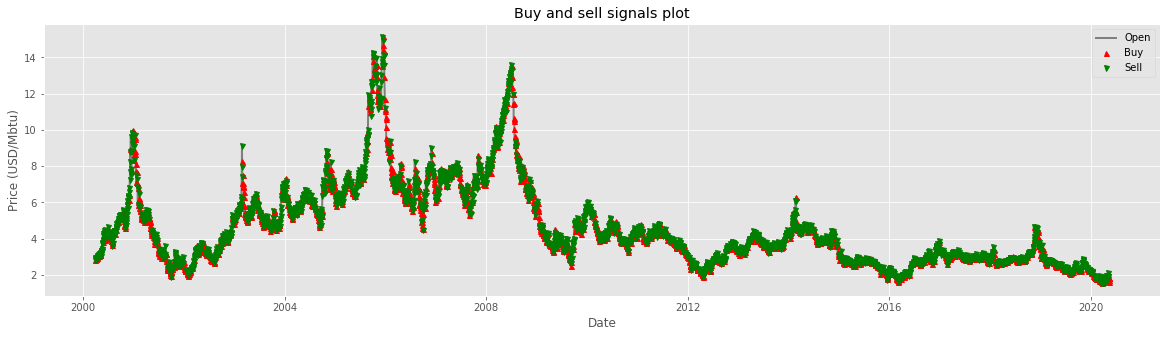

In [0]:
# For each day where open price > 0, we set the signal 1 means sell  and < 0, we set signal 0, to buy 
print('\033[4mFor each day where open price = 0 = black arrow head  and 1 = green arrow head \033[0m')
buys = Data.loc[Data['target']  <0]
sells = Data.loc[Data['target'] > 0]

# Plot 
fig = plt.figure(figsize=(20, 5))
plt.plot(Data.index, Data['Open'], color = 'gray', lw=2., label='Open')

# Plot the buy and sell signals on the same plot
plt.plot(buys.index, Data.loc[buys.index]['Open'], '^', markersize=5, color='r',
         lw=2., label='Buy')
plt.plot(sells.index, Data.loc[sells.index]['Open'], 'v', markersize=5, color='g',
         lw=2., label='Sell')
plt.ylabel('Price (USD/Mbtu)')
plt.xlabel('Date')
plt.title('Buy and sell signals plot')
plt.legend(loc=0)

# Display everything
plt.show()
print('\n')

## Open

In [0]:
# Merging relevant features
merge1 = data.join(coal, how='left').ffill().bfill()
merge2 = merge1.join(vl_import, how='left').ffill().bfill()
merge3 = merge2.join(price_im, how='left').ffill().bfill()
merge4 = merge3.join(pr_export, how='left').ffill().bfill()
merge5 = merge4.join(drilling, how='left').ffill().bfill()

df1 = merge5.copy()
df1.drop(['Powder River Basin 8,800 Btu, 0.8 SO2',
              'Uinta Basin 11,700 Btu, 0.8 SO2', 
           'High', 'Low', 'Close', 'Volume',
           'Adj Close'], axis=1, inplace=True)


df1['sma3'] = df1.Open.rolling(window=3).mean()
df1['sma9'] = df1['Open'].rolling(window=9).mean()
df1['sma20'] = df1['Open'].rolling(window=20).mean()
#df1["open_1"] = df1.Open.shift(1)

df1['ROC'] = ((df1['Open'] - df1['Open'].shift(5)) / (df1['Open'].shift(5)))*100

# Creating Bollinger Bands
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
#rolling_mean = df1.Open.rolling(window).mean()
#rolling_std = df1.Open.rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
#B['Rolling Mean'] = rolling_mean.fillna(0)
#df1['bb_high'] = (rolling_mean + (rolling_std * no_of_std))
#df1['bb_low'] = (rolling_mean - (rolling_std * no_of_std))

# Create Exponential moving average
#df1['ema'] = df1.Open.ewm(com=0.5).mean()

# feature engineering
df1['day_of_week'] = df1.index.dayofweek
df1['day_of_month'] = df1.index.day

df1['label'] = df1.Open.shift(-10) 
df1.dropna(inplace=True)

# The rows with nulls generated by rolling values will be removed.
df1.tail(10)

In [0]:
df1.tail()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

In [0]:
X = np.array(df1.copy().drop(['label'], axis=1))
y = np.array(df1['label']).copy()  # assigning Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state=42, shuffle=False)
tscv = TimeSeriesSplit(max_train_size=None, n_splits=10)
#TimeSeriesSplit(max_train_size=0.80, n_splits=10)
for train_samples, test_samples in tscv.split(X_train, y_train):
  #print("TRAIN:", train_samples, "TEST:", test_samples)
  X_train, X_test = X[train_samples], X[test_samples]
  y_train, y_test = y[train_samples], y[test_samples]

learner = LinearRegression()
#XGBRegressor(objective ='reg:squarederror'); #initializing linear regression model

learner.fit(X_train,y_train); #training the linear regression model
op_score=learner.score(X_test,y_test);#testing the linear regression model

y_pred = learner.predict(X_test); 
forecast = y_pred[-10:] #set that will contain the forecasted data
op_score = round(op_score*100,2).astype(str) + '%'
print(op_score); print(forecast);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

55.57%
[1.7070722  1.71794007 1.68080594 1.65973306 1.72806276 1.69303784
 1.67366561 1.73866795 1.76769234 1.71764222]


In [0]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-13,1.695,1.741,1.595,1.643,1.616,248140.0
2020-05-14,1.643,1.715,1.610,1.674,1.681,198874.0
2020-05-15,1.675,1.732,1.634,1.636,1.646,162964.0
2020-05-18,1.725,1.851,1.702,1.766,1.783,217242.0
2020-05-19,1.769,1.857,1.763,1.797,1.830,229500.0


In [0]:
from sklearn import metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, learner.predict(X_test)))
rmse1

<IPython.core.display.Javascript object>

0.3465242343778583

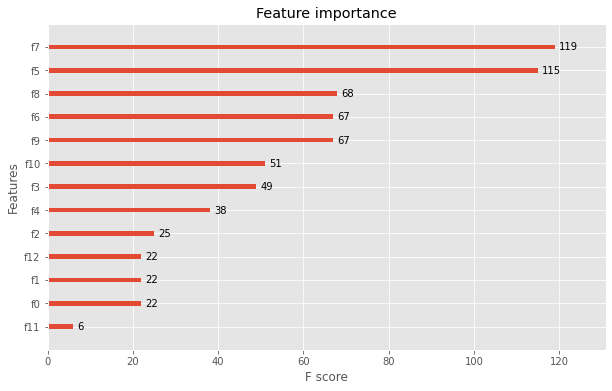

In [0]:
# Feature importance
plt.rcParams['figure.figsize'] = [10,6]
plot_importance(learner)

In [0]:
forecast = pd.DataFrame(forecast)

open_forecast = forecast.copy()
open_forecast = open_forecast.head()

# assigning names to columns
open_forecast.rename(columns = {0: 'open_predict'}, inplace=True)

d = data.tail()
d.reset_index(inplace=True)
d = d.append(pd.DataFrame({'Date': pd.date_range(start=d.Date.iloc[-1], periods=6,
                                             freq = 'B', closed='right')}))
d.set_index('Date', inplace=True)
d = d.tail()

open_forecast.index = d.index
open_forecast = open_forecast.assign(day_of_week = lambda x: x.index.day_name())

open_forecast['diff'] = open_forecast['open_predict'].diff()

open_forecast['direction'] = np.where(open_forecast['diff'] > 0, 1, 0)
open_forecast['direction'].replace([0,1],['Open_down','Open_up'],inplace=True)
open_forecast = open_forecast.round(decimals=2)
open_forecast

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,open_predict,day_of_week,diff,direction
Date,,,,
2020-05-22,1.71,Friday,NaN,Open_down
2020-05-25,1.72,Monday,0.01,Open_up
2020-05-26,1.68,Tuesday,-0.04,Open_down
2020-05-27,1.66,Wednesday,-0.02,Open_down
2020-05-28,1.73,Thursday,0.07,Open_up


In [0]:
op = y_pred.copy()
op = pd.DataFrame(op)
op = op.tail()
D = data.tail()
op.index = D.index
op.rename(columns = {0: 'predicted'}, inplace=True)
op = pd.concat([round(op['predicted'], 3), data['Open'].tail()], axis=1)
op = op.sort_values(by='Date', ascending=False)
op['accuracy'] = round(op.apply(lambda row: row.predicted / 
                                            row.Open *100, axis = 1),2)
op['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in op['accuracy']], 
                                     index = op.index)
op = op.assign(day_of_week = lambda x: x.index.day_name())
op = op.reset_index()
op

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date,predicted,Open,accuracy,day_of_week
0,2020-05-21,1.718,1.778,96.63%,Thursday
1,2020-05-20,1.768,1.804,98.00%,Wednesday
2,2020-05-19,1.739,1.769,98.30%,Tuesday
3,2020-05-18,1.674,1.725,97.04%,Monday
4,2020-05-15,1.693,1.675,101.07%,Friday


In [0]:
#op = forecast.copy()
#op = op.head()
#op.index = data.tail().index
#op.rename(columns = {0: 'predicted'}, inplace=True)
#op = pd.concat([round(op['predicted'], 3), data['Open'].tail()], axis=1)
#op = op.sort_values(by='Date', ascending=False)
#op['accuracy'] = round(op.apply(lambda row: row.predicted / 
 #                                           row.Open *100, axis = 1),2)
#op['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in op['accuracy']], 
                                     index = op.index)
#op = op.assign(day_of_week = lambda x: x.index.day_name())
#op = op.reset_index()
#op

In [0]:
import plotly.graph_objects as go

In [0]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=op['Date'],
    y=op['Open'],
    name="Actual open price"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=op['Date'],
    y=op['predicted'],
    name="Predicted open price"
))

fig.update_layout(
    title="Actual vs Predicted Open Price",
    #xaxis_title="Date",
    yaxis_title="Price ($/Mbtu)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,)
fig.update_layout(legend_orientation="h")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Close

In [0]:
# Merging relevant features
merge1 = data.join(coal, how='left').ffill().bfill()
merge2 = merge1.join(vl_import, how='left').ffill().bfill()
merge3 = merge2.join(price_im, how='left').ffill().bfill()
merge4 = merge3.join(pr_export, how='left').ffill().bfill()
merge5 = merge4.join(drilling, how='left').ffill().bfill()

df2 = merge5.copy()
df2.drop(['Powder River Basin 8,800 Btu, 0.8 SO2',
              'Uinta Basin 11,700 Btu, 0.8 SO2'], axis=1, inplace=True)

df2['pct_chng'] = df2['Close'].pct_change()
df2['ROC'] = ((df2['Close'] - df2['Close'].shift(5)) / (df2['Close'].shift(5)))*100
df2['cum_ret'] = (df2['pct_chng'] + 1).cumprod()
df2['sma2'] = df2['Close'].rolling(window=2).mean()
df2['sma5'] = df2['Close'].rolling(window=5).mean()
df2['sma10'] = df2['Close'].rolling(window=10).mean()
df2['sma20'] = df2['Close'].rolling(window=20).mean()

# Ease of Movement 
dm = ((df2['High'] + df2['Low'])/2) - ((df2['High'].shift(1) + df2['Low'].shift(1))/2)
br = (df2['Volume'] / 100000000) / ((df2['High'] - df2['Low']))
#df2['EVM'] = dm / br 

rsi_period = 14 
chg = df2['Close'].diff(1)
gain = chg.mask(chg<0,0)
gain = gain
loss = chg.mask(chg>0,0)
loss = loss
avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
rs = abs(avg_gain/avg_loss)
#df2['rsi'] = 100-(100/(1+ rs))

std = df2['Close'].rolling(window=20).std() 
df2['Upper'] = df2['sma20'] + (std * 2)
df2['Lower'] = df2['sma20'] - (std * 2)

# we also add three new columns ‘ho’ ‘lo’ and ‘gain’
df2['h_o'] = df2['High'] - df2['Open'] # distance between Highest and Opening price
df2['l_o'] = df2['Low'] - df2['Open'] # distance between Lowest and Opening price
#df2['gain'] = df2['Close'] - df2['Open']


# feature engineering
df2['day_of_week'] = df2.index.dayofweek
df2['day_of_month'] = df2.index.day

df2['label'] = df2.Close.shift(-10) 
df2.dropna(inplace=True)

df2 = df2.replace([np.inf, -np.inf], np.nan)
df2.dropna(inplace=True)
df2.tail()

In [0]:
X = np.array(df2.copy().drop(['label', 'High',	'Low','Open',	
                           'Volume',	'Adj Close'], axis=1))
y = np.array(df2['label']).copy()  # assigning Y
    
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, 
                                                    random_state=42, shuffle=False)
tscv = TimeSeriesSplit(max_train_size=None, n_splits=10)
#TimeSeriesSplit(max_train_size=0.80, n_splits=10)
for train_samples, test_samples in tscv.split(Xtrain, ytrain):
  #print("TRAIN:", train_samples, "TEST:", test_samples)
  Xtrain, Xtest = X[train_samples], X[test_samples]
  ytrain, ytest = y[train_samples], y[test_samples]

model = LinearRegression(); #initializing linear regression model
#XGBRegressor(objective='reg:squarederror' )
#LinearRegression(); #initializing linear regression model

model.fit(Xtrain, ytrain); #training the linear regression model
cl_score=model.score(Xtest,ytest);#testing the linear regression model

ypred =model.predict(Xtest)
c_fore= ypred[-10:]; #set that will contain the forecasted data

cl_score = round(cl_score*100,2).astype(str) + '%'
print(cl_score); print(c_fore);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

50.93%
[1.7080913  1.64058252 1.65954949 1.70890054 1.67496913 1.64623111
 1.67095093 1.74082534 1.70301213 1.6561605 ]


In [0]:
rmse2 = np.sqrt(metrics.mean_squared_error(ytest, model.predict(Xtest)))
rmse2

<IPython.core.display.Javascript object>

0.35984035749004384

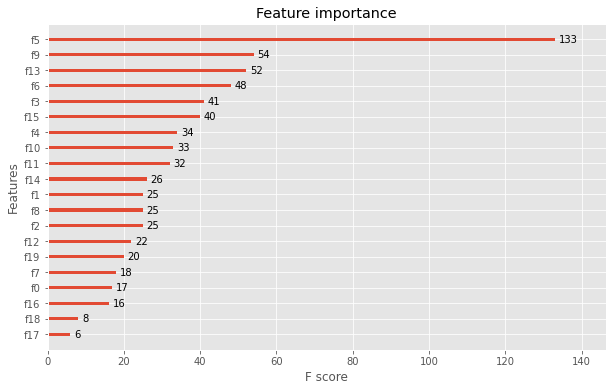

In [0]:
# Feature importance
plt.rcParams['figure.figsize'] = [10,6]
plot_importance(model)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
c_fore = pd.DataFrame(c_fore);

close_forecast = c_fore.copy();
close_forecast = close_forecast.head()

# assigning names to columns
close_forecast.rename(columns = {0: 'close_predict'}, inplace=True)

close_forecast.index = d.index
close_forecast = close_forecast.assign(day_of_week = lambda x: x.index.day_name())

close_forecast['diff'] = close_forecast['close_predict'].diff()

close_forecast['direction'] = np.where(close_forecast['diff'] > 0, 1, 0)
close_forecast['direction'].replace([0,1],['Close_down','Close_up'],inplace=True)
close_forecast = close_forecast.round(decimals=2)
close_forecast


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,close_predict,day_of_week,diff,direction
Date,,,,
2020-05-22,1.71,Friday,NaN,Close_down
2020-05-25,1.64,Monday,-0.07,Close_down
2020-05-26,1.66,Tuesday,0.02,Close_up
2020-05-27,1.71,Wednesday,0.05,Close_up
2020-05-28,1.67,Thursday,-0.03,Close_down


In [0]:
cp = ypred.copy()
cp = pd.DataFrame(cp)
cp = cp.tail()
E = data.tail()
cp.index = E.index
cp.rename(columns = {0: 'predicted'}, inplace=True)
cp = pd.concat([round(cp['predicted'], 3), data['Close'].tail()], axis=1)
cp = cp.sort_values(by='Date', ascending=False)
cp['accuracy'] = round(cp.apply(lambda row: row.predicted / 
                                            row.Close *100, axis = 1),2)
cp['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in cp['accuracy']], 
                                     index = cp.index)
cp = cp.assign(day_of_week = lambda x: x.index.day_name())
cp = cp.reset_index()
cp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date,predicted,Close,accuracy,day_of_week
0,2020-05-21,1.656,1.720,96.28%,Thursday
1,2020-05-20,1.703,1.781,95.62%,Wednesday
2,2020-05-19,1.741,1.797,96.88%,Tuesday
3,2020-05-18,1.671,1.766,94.62%,Monday
4,2020-05-15,1.646,1.636,100.61%,Friday


In [0]:
#cp = c_fore.copy()
#cp = cp.head()
#cp.index = data.tail().index
#cp.rename(columns = {0: 'predicted'}, inplace=True)
#cp = pd.concat([round(cp['predicted'], 3), data['Close'].tail()], axis=1)
#cp = cp.sort_values(by='Date', ascending=False)
#cp['accuracy'] = round(cp.apply(lambda row: row.predicted / 
                                         #   row.Close *100, axis = 1),2)
#cp['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in cp['accuracy']], 
                                    # index = cp.index)
#cp = cp.assign(day_of_week = lambda x: x.index.day_name())
#cp = cp.reset_index()
#cp

In [0]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=cp['Date'],
    y=cp['Close'],
    name="Actual open price"       # this sets its legend entry
))


fig.add_trace(go.Scatter(
    x=cp['Date'],
    y=cp['predicted'],
    name="Predicted close price"
))

fig.update_layout(
    title="Actual vs Predicted Open Price",
    #xaxis_title="Date",
    yaxis_title="Price ($/Mbtu)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,)
fig.update_layout(legend_orientation="h")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
h_stack = pd.concat([open_forecast['open_predict'], close_forecast['close_predict']], axis=1)
h_stack = h_stack.assign(day_of_week = lambda x: x.index.day_name())
h_stack = h_stack.reset_index()
h_stack

<IPython.core.display.Javascript object>

,Date,open_predict,close_predict,day_of_week
0,2020-05-22,1.71,1.71,Friday
1,2020-05-25,1.72,1.64,Monday
2,2020-05-26,1.68,1.66,Tuesday
3,2020-05-27,1.66,1.71,Wednesday
4,2020-05-28,1.73,1.67,Thursday


In [0]:
NG1 = data.copy()
NG1.reset_index(inplace=True)
NG1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5104,2020-05-13,1.695,1.741,1.595,1.643,1.616,248140.0
5105,2020-05-14,1.643,1.715,1.610,1.674,1.681,198874.0
5106,2020-05-15,1.675,1.732,1.634,1.636,1.646,162964.0
5107,2020-05-18,1.725,1.851,1.702,1.766,1.783,217242.0
5108,2020-05-19,1.769,1.857,1.763,1.797,1.830,229500.0
